# Images

The most basic class for the image in SMILI is *imdata.IMFITS* object.Here, we show its basic usage.
You can see list of functions at [in this page](../../_autodoc/smili.html).

In [1]:
%matplotlib inline
from smili import imdata, util

# this is for plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

## Creating a blank image

Let's start from a blank image. You can make a blank image.

(<matplotlib.image.AxesImage at 0x1c1da92a90>,
 <matplotlib.colorbar.Colorbar at 0x1c1dadf110>)

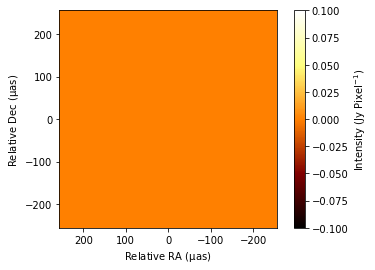

In [2]:
# Create a blank image
image = imdata.IMFITS(
    # pixel size in the specified angular unit (you can specify dy if you want a non-square image pixel)
    dx = 2, 
    # number of pixels (you can also specify ny if you want a non-square field of view)
    nx = 256,
    # angular unit (e.g., rad, deg, amin/arcmin, asec/arcsec, mas, uas)
    angunit="uas"      
)

# Plot image (We will explain this function later)
image.imshow(scale="linear", colorbar="True")

SMILI also can edit the location of the origin by nxref and nyref in the unit of the pixel number. Note that nxref=1, nyref=1 means the center will be set to the center of the leftmost and bottom pixel. 

(<matplotlib.image.AxesImage at 0x1c1dc70f90>,
 <matplotlib.colorbar.Colorbar at 0x1c1ddc2610>)

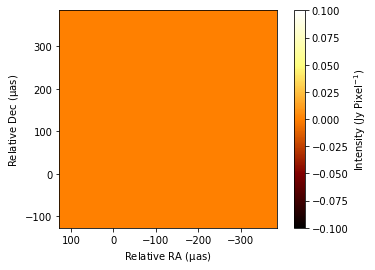

In [3]:
# Create a blank image
image = imdata.IMFITS(
    dx = 2, 
    nx = 256,
    nxref = 64,
    nyref = 64,
    angunit="uas" 
)

# Plot image
image.imshow(scale="linear", colorbar="True")

## Loading images from FITS files
Here, we use [an FITS image](BU_3C273_sampleimage.fits) reconstructed with SMILI from a 43 GHz 3C 273 data set of [the Boston University Blazar Group](https://www.bu.edu/blazars/VLBAproject.html).

(<matplotlib.image.AxesImage at 0x1c1de61650>,
 <matplotlib.colorbar.Colorbar at 0x1c1df6fc10>)

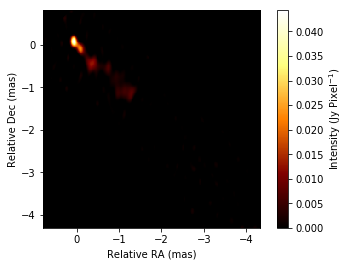

In [4]:
image = imdata.IMFITS(
    "./BU_3C273_sampleimage.fits",  # filename
    angunit="mas" # default angular unit that you want to use
)

# Plot image
image.imshow(scale="linear", colorbar="True")

The popular FITS format, for instance, images from DIFMAP/AIPS can be loaded without a problem. However, there are some options to load images with non-popular FITS formats.

In [ ]:
# Default
image = imdata.IMFITS(
    "example.fits",  
    imfitstype="standard", # this is the deafult option for SMILI FITS, AIPS/DIFMAP FITS files.
    angunit="mas" 
)

# FITS files generated by eht-im
image = imdata.IMFITS(
    "example.fits",  
    imfitstype="ehtim", # this is the option if you want to load fits files generated by eht-imaging library
    angunit="mas" 
)

# AIPS CC Table
image = imdata.IMFITS(
    "example.fits",  
    imfitstype="aipscc", # this is the option if you want to load AIPS CC tables instead of the image data
    angunit="mas" 
)

## Plot images  
SMILI's default plotting function is imdata.IMFITS.imshow. This function is inheriting [pyplot.imshow](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html) so you can use all of arguments in pyplot.imshow to customize your plots. 

(<matplotlib.image.AxesImage at 0x1c1f0e0410>,
 <matplotlib.colorbar.Colorbar at 0x1c1f118710>)

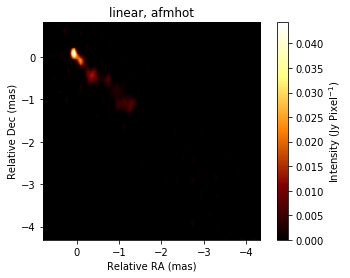

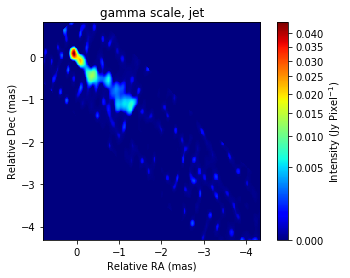

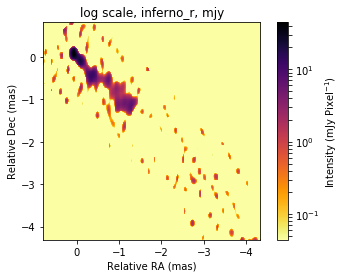

In [5]:
# linear scale
plt.figure()
plt.title("linear, afmhot")
image.imshow(
    scale="linear", 
    colorbar="True")

# Gamma scale
plt.figure()
plt.title("gamma scale, jet")
image.imshow(
    scale="gamma", 
    gamma=0.5, 
    cmap=cm.jet, 
    colorbar="True")

# Log Scale
plt.figure()
plt.title("log scale, inferno_r, mjy")
image.imshow(scale="log", dyrange=1000, fluxunit="mjy", cmap=cm.inferno_r, colorbar="True")

If you set the beam information, then you can also compute Jy/beam

(<matplotlib.image.AxesImage at 0x1c1f3b8c90>,
 <matplotlib.colorbar.Colorbar at 0x1c1f359250>)

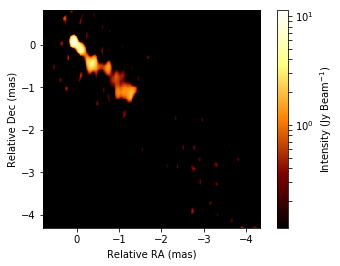

In [6]:
# Set beam to image.
image.set_beam(majsize=0.3,minsize=0.3,angunit="mas")

# Plot convolved image with beam.
image.imshow(fluxunit="jy",saunit="beam", scale="log", dyrange=100, colorbar=True)

## Extracting information of images

You can get low level infromation of IMFITS object here.

- imdata.IMFITS.header: Header information
- imdata.IMFITS.data: 4 dimensional array of images.

In [7]:
# Header information (dictionary)
print("Header Information")
print(image.header)

# Example: extract header parameters.
nx = image.header["nx"]
ny = image.header["ny"]
nxref = image.header["nxref"]
nyref = image.header["nyref"]
dx = image.header["dx"]*util.angconv("deg", "mas")
dy = image.header["dy"]*util.angconv("deg", "mas")

print("Example information read from the header")
print("  Number of pixels: (nx, ny) = (%d, %d)" % (nx,ny))
print("  Reference pixel:  (nxref, nyref) = (%d, %d)" % (nxref,nyref))
print("  Pixel size:       (dx, dy) = (%1.2f, %1.2f) [mas]" % (dx,dy))

Header Information
{'telescope': 'VLBA', 'observer': 'BM413X', 'nyref': 216.0, 'bmaj': 8.333333333333333e-08, 'instrument': 'VLBA', 'nsref': 1, 'nf': 1, 'nx': 256, 'ny': 256, 'bmin': 8.333333333333333e-08, 'nfref': 1.0, 'ns': 1, 'df': 64000000.0, 'object': '3C273', 'dateobs': None, 'nxref': 40.0, 'dx': -5.5555555555555e-09, 'dy': 5.55555555555555e-09, 'ds': 1, 'bpa': 0.0, 'f': 43007500000.0, 's': 1, 'y': 2.05238841111, 'x': 187.277915537}
Example information read from the header
  Number of pixels: (nx, ny) = (256, 256)
  Reference pixel:  (nxref, nyref) = (40, 216)
  Pixel size:       (dx, dy) = (-0.02, 0.02) [mas]


In [8]:
# low level image array information (in Jy/pixel)
print("Shape of the image array:")
print(image.data.shape)

print("")
print("Array:")
print(image.data)

Shape of the image array:
(1, 1, 256, 256)

Array:
[[[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.21214561e-06
    1.46166836e-05 2.08356582e-04]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.90111877e-06
    7.22100152e-06 2.47679859e-05]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.56583850e-06
    4.00781271e-06 8.47375404e-06]
   ...
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]]]]


There are many additonal functions to get some information about images.

- Total Flux and Peak Intensity

In [9]:
totalflux = image.totalflux()
peak = image.peak(fluxunit="Jy", saunit="pixel")
print("total flux = %1.2f Jy" % (totalflux))
print("peak flux = %1.2f Jy/pixel" % (peak))

total flux = 10.23 Jy
peak flux = 0.04 Jy/pixel


- Grid coordinates

Image Extent
[ 0.79 -4.33 -4.31  0.81]

1D coodirnate grids
[ 0.78  0.76  0.74  0.72  0.7   0.68  0.66  0.64  0.62  0.6   0.58  0.56
  0.54  0.52  0.5   0.48  0.46  0.44  0.42  0.4   0.38  0.36  0.34  0.32
  0.3   0.28  0.26  0.24  0.22  0.2   0.18  0.16  0.14  0.12  0.1   0.08
  0.06  0.04  0.02 -0.   -0.02 -0.04 -0.06 -0.08 -0.1  -0.12 -0.14 -0.16
 -0.18 -0.2  -0.22 -0.24 -0.26 -0.28 -0.3  -0.32 -0.34 -0.36 -0.38 -0.4
 -0.42 -0.44 -0.46 -0.48 -0.5  -0.52 -0.54 -0.56 -0.58 -0.6  -0.62 -0.64
 -0.66 -0.68 -0.7  -0.72 -0.74 -0.76 -0.78 -0.8  -0.82 -0.84 -0.86 -0.88
 -0.9  -0.92 -0.94 -0.96 -0.98 -1.   -1.02 -1.04 -1.06 -1.08 -1.1  -1.12
 -1.14 -1.16 -1.18 -1.2  -1.22 -1.24 -1.26 -1.28 -1.3  -1.32 -1.34 -1.36
 -1.38 -1.4  -1.42 -1.44 -1.46 -1.48 -1.5  -1.52 -1.54 -1.56 -1.58 -1.6
 -1.62 -1.64 -1.66 -1.68 -1.7  -1.72 -1.74 -1.76 -1.78 -1.8  -1.82 -1.84
 -1.86 -1.88 -1.9  -1.92 -1.94 -1.96 -1.98 -2.   -2.02 -2.04 -2.06 -2.08
 -2.1  -2.12 -2.14 -2.16 -2.18 -2.2  -2.22 -2.24 -2.26 -2.28 -2.3 

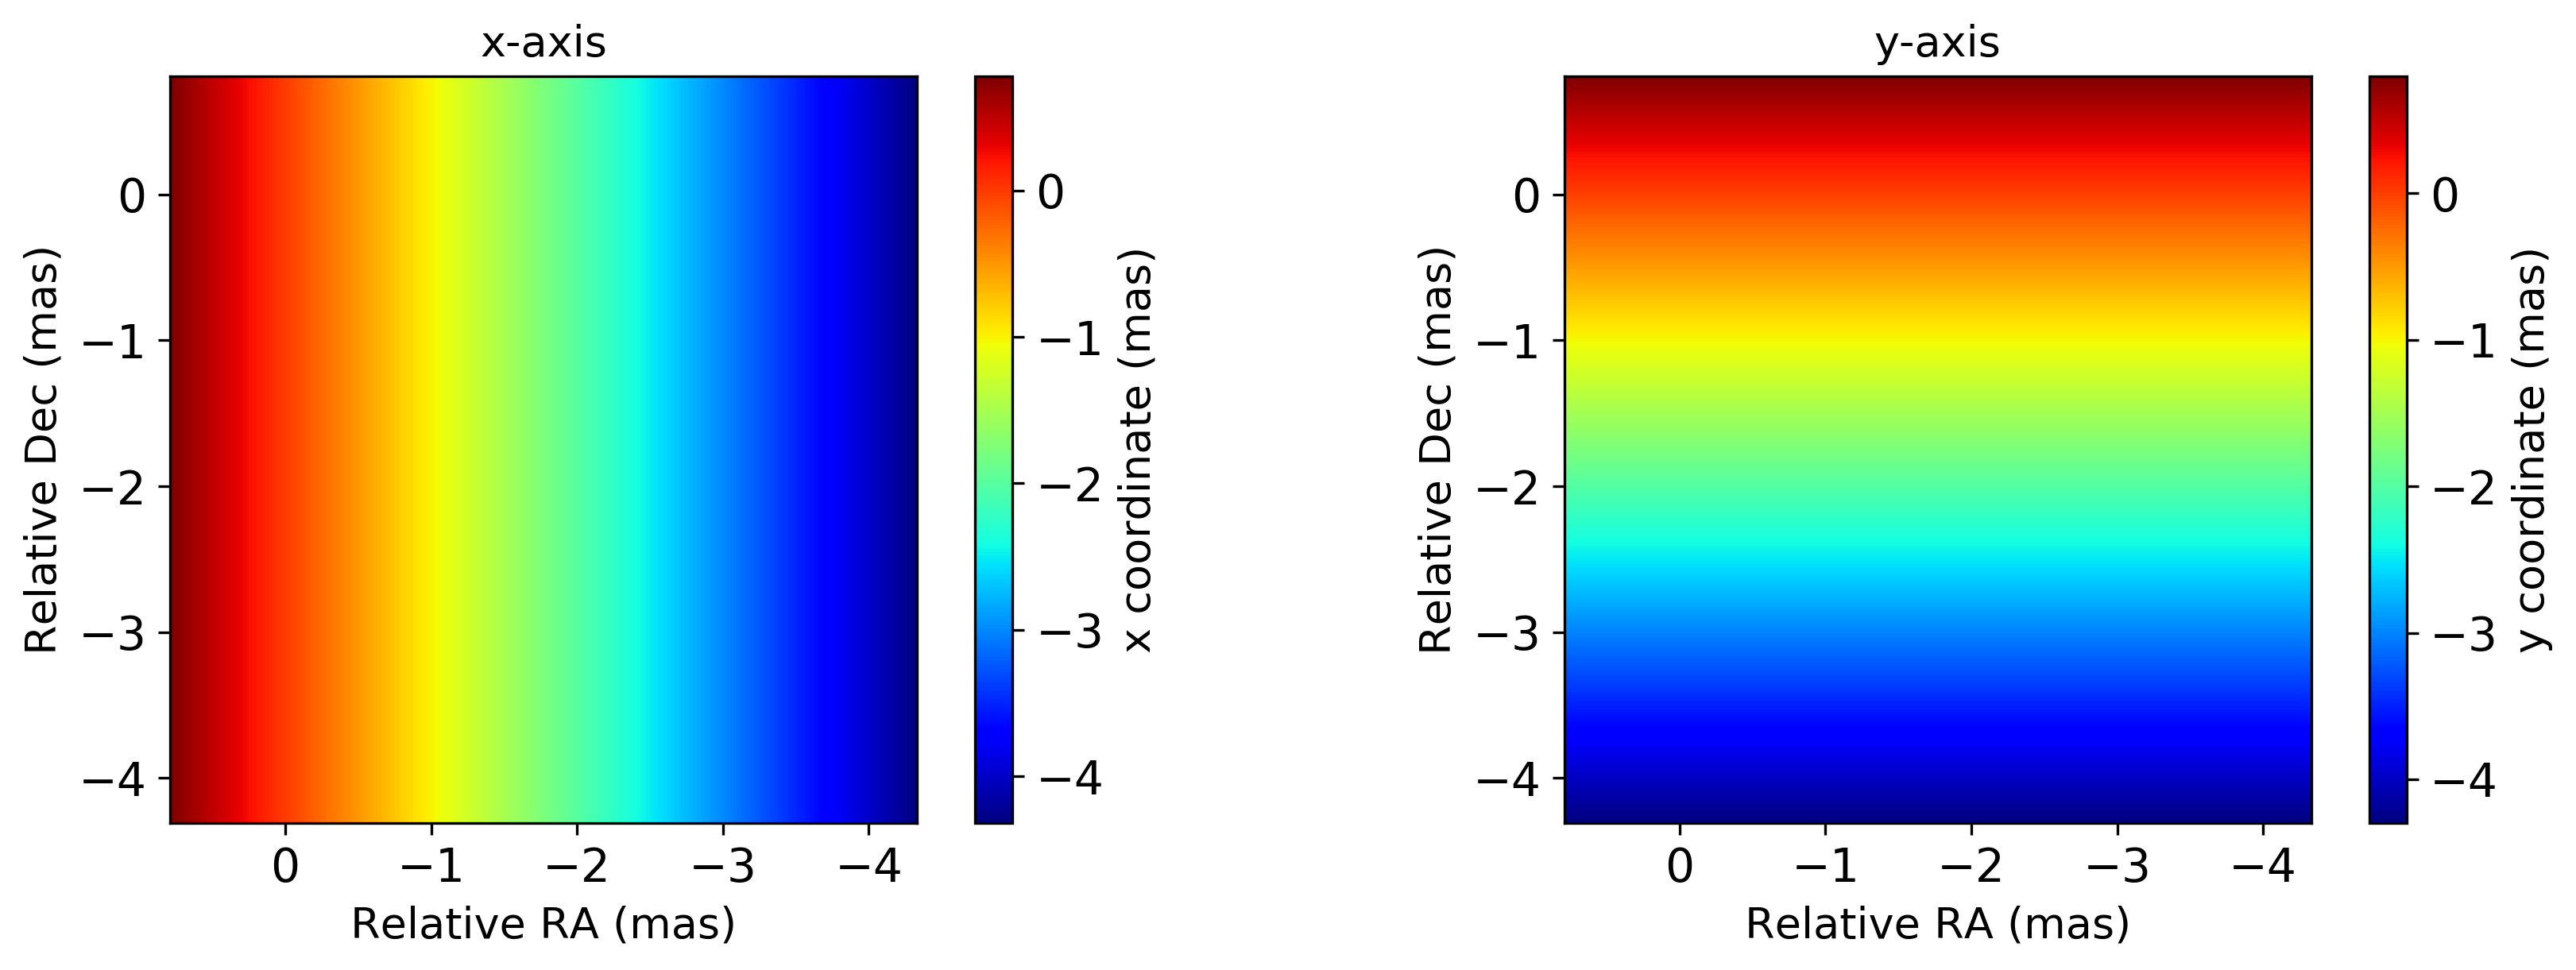

In [10]:
# Image extent: compatible with extent argument of pyplot.imshow
imextent = image.get_imextent(angunit="mas")
print("Image Extent")
print(imextent)
print("")

# 1D GRID
x, y = image.get_xygrid(twodim=False, angunit="mas")
print("1D coodirnate grids")
print(x)
print("")

# 2D GRID
x, y = image.get_xygrid(twodim=True, angunit="mas")
print("2D coodirnate grids")

util.matplotlibrc(ncols=2, width=500, height=300)
fig, axs = plt.subplots(ncols=2)
plt.sca(axs[0])
plt.title("x-axis")
plt.imshow(x, extent=imextent, cmap=cm.jet, origin="lower")
plt.xlabel("Relative RA (mas)")
plt.ylabel("Relative Dec (mas)")
plt.colorbar(label="x coordinate (mas)")

plt.sca(axs[1])
plt.title("y-axis")
plt.imshow(y, extent=imextent, cmap=cm.jet, origin="lower")
plt.xlabel("Relative RA (mas)")
plt.ylabel("Relative Dec (mas)")
plt.colorbar(label="y coordinate (mas)")

mpl.rcdefaults()

- two dimensional image array

In [11]:
imarr = image.get_imarray()
imarr

array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          9.21214561e-06, 1.46166836e-05, 2.08356582e-04],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          5.90111877e-06, 7.22100152e-06, 2.47679859e-05],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          3.56583850e-06, 4.00781271e-06, 8.47375404e-06],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]]])

## Editing Images

From the above functions, you can compute some quantities, do analysis and edit images. 
We also have several functions to edit images (e.g. shift, convolving, regridding) which will be frequently used.
Here, we show some representatitive functions.

- Shifting:

When you want to shift the image, peakshift, comshift, and refshift are available.

{'y0': 0.07999999999999992, 'x0': 0.059999999999999394, 'angunit': 'mas'}


(<matplotlib.image.AxesImage at 0x1c2151fc10>,
 <matplotlib.colorbar.Colorbar at 0x1c24648210>)

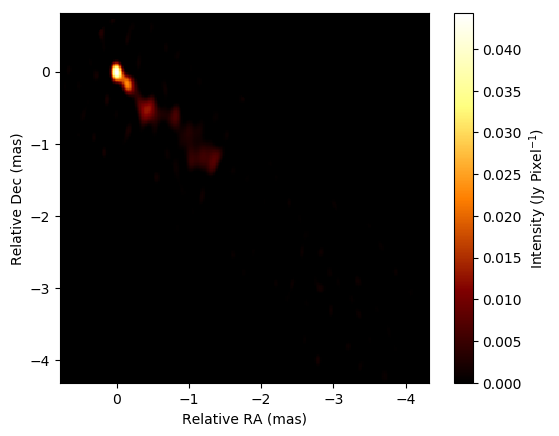

In [12]:
# Check peak position
print(image.peakpos())

# Shift the peak position to the origin
image.peakshift().imshow(scale="linear", colorbar="True")

{'y0': -0.5030372749420002, 'x0': -0.5017984082235737, 'angunit': 'mas'}


(<matplotlib.image.AxesImage at 0x1c1f2fef90>,
 <matplotlib.colorbar.Colorbar at 0x1c1f1fa110>)

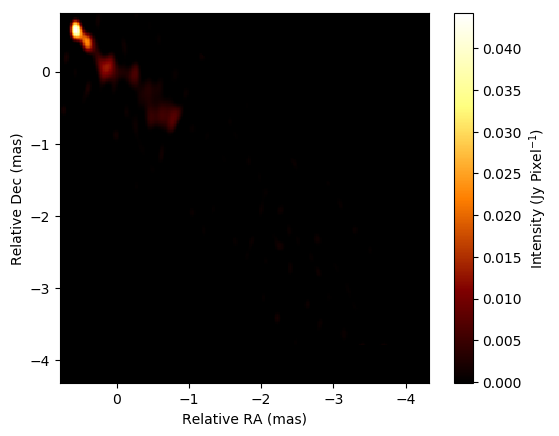

In [13]:
# Check the position of center of mass (COM).
print(image.compos())

# Shift the COM position to the origin
image.comshift().imshow(scale="linear", colorbar="True")

(<matplotlib.image.AxesImage at 0x1c1dfe6d90>,
 <matplotlib.colorbar.Colorbar at 0x1c1e314050>)

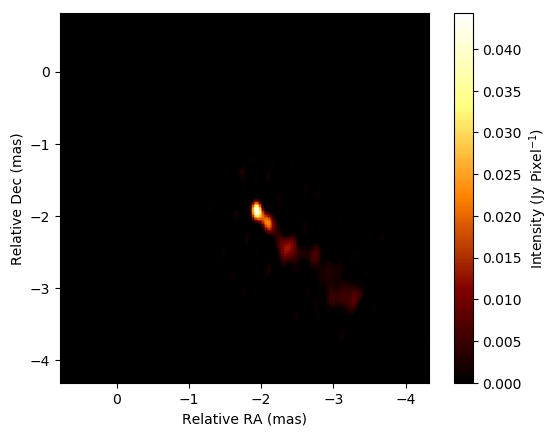

In [14]:
# Shift the center to the arbitral location
image.refshift(x0=2, y0=2).imshow(scale="linear", colorbar="True")

- Image copy and re-gridding

(<matplotlib.image.AxesImage at 0x1c1fa4e250>,
 <matplotlib.colorbar.Colorbar at 0x1c1fa84810>)

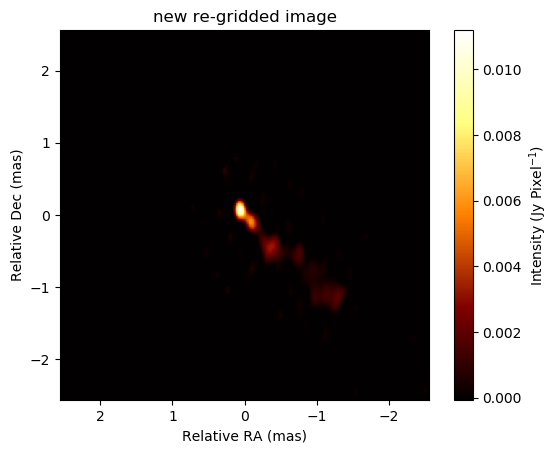

In [15]:
# New grid parameters
newdx = image.header["dx"]*util.angconv("deg","mas")/2
newnx = image.header["nx"]*2

# Making an image based on new grids
blank = imdata.IMFITS(dx=newdx,nx=newnx,angunit="mas")  
image_regrid = blank.cpimage(image) # regridding the image

plt.title("new re-gridded image")
image_regrid.imshow(scale="linear", colorbar="True")

- Convolution

(<matplotlib.image.AxesImage at 0x1c1fd5a490>,
 <matplotlib.colorbar.Colorbar at 0x1c1fb9ba50>)

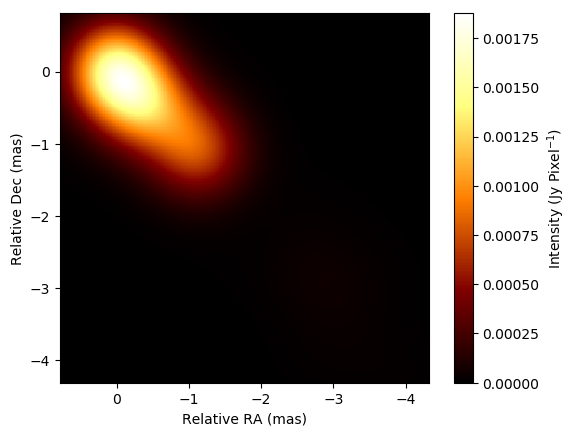

In [17]:
image.convolve_gauss(majsize=1.0, angunit="mas").imshow(scale="linear", colorbar="True")

- Soft/Hard/minimum Thresholding 

(<matplotlib.image.AxesImage at 0x1c2000b610>,
 <matplotlib.colorbar.Colorbar at 0x1c200a8bd0>)

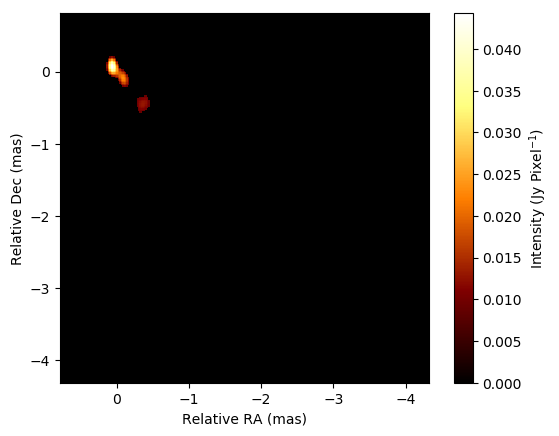

In [18]:
image.hard_threshold(threshold=0.2, relative=True, save_totalflux=False).imshow(scale="linear", colorbar="True")

(<matplotlib.image.AxesImage at 0x1c2076bbd0>,
 <matplotlib.colorbar.Colorbar at 0x1c20a551d0>)

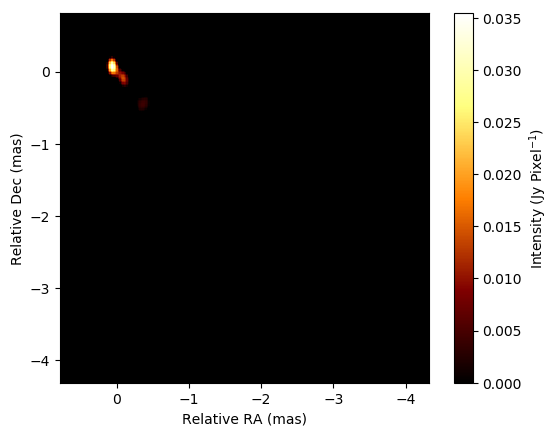

In [19]:
image.soft_threshold(threshold=0.2, relative=True, save_totalflux=False).imshow(scale="linear", colorbar="True")

Mininum threshold is slightly different
from hard thresholding, since the former resets all of pixels where
their brightness is smaller than a given threshold. On the other hand,
hard thresholding resets all of pixels where the absolute of their
brightness is smaller than the threshold.

(<matplotlib.image.AxesImage at 0x1c20b1dc90>,
 <matplotlib.colorbar.Colorbar at 0x1c20b5f290>)

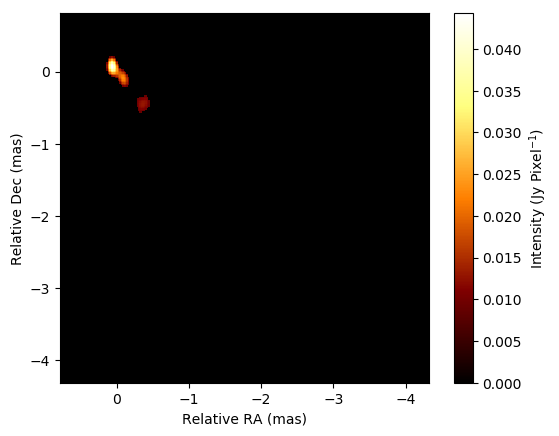

In [20]:
image.min_threshold(threshold=0.2, relative=True, save_totalflux=False).imshow(scale="linear", colorbar="True")

## Save images to files

There are a couple of formats that SMILI can output

In [21]:
# to Image FITS file (w/ AIPS CC table equivalent with the pixel brightness information)
image.to_fits("save_test.fits")

# to DIFMAP model file
image.to_fits("save_test.mod")

## Acknowledgement

This notebook makes use of 43 GHz VLBA data from the VLBA-BU Blazar Monitoring Program (VLBA-BU-BLAZAR;
http://www.bu.edu/blazars/VLBAproject.html), funded by NASA through the Fermi Guest Investigator Program. The VLBA is an instrument of the National Radio Astronomy Observatory. The National Radio Astronomy Observatory is a facility of the National Science Foundation operated by Associated Universities, Inc.